In [2]:
import numpy as np
import matplotlib.pyplot as plt
figure_size = (6,4)

In [4]:
import os
import numpy as np
import pandas as pd

coefficients = np.loadtxt('polynomial_coefficients_mean.txt')

def plot_profile(directory):
    mean_voltages = []
    y_vals = []

    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            # Process the file here
            data = pd.read_csv(os.path.join(directory, filename))   
            mean_voltage = np.mean(data.iloc[:, 1])
            mean_voltages.append(mean_voltage)

            y_val = ''
            for i, letter in enumerate(filename):
                if filename[i] == 'y' and filename[i+1] == '=':
                    while filename[i+2].isdigit() or filename[i+2]==',':
                        if filename[i+2]==',':
                            y_val += '.'
                        else:
                            y_val += filename[i+2]
                        i += 1
                    y_vals.append(float(y_val))


    u = np.polyval(coefficients, mean_voltages)

    sorted_indices = np.argsort(y_vals)
    y_vals = np.array(y_vals)[sorted_indices]
    u = np.array(u)[sorted_indices]

    # Plot the points and the fitted curve
    plt.figure(figsize=figure_size)
    plt.scatter(y_vals, u, label='Data', color='blue')
    plt.plot(y_vals, u, color='blue')
    plt.legend()
    plt.ylim(0, max(u)*1.2)
    plt.title('Velocity profile')
    plt.xlabel('y')
    plt.ylabel('Velocity [m/s]')
    plt.grid()
    plt.show()


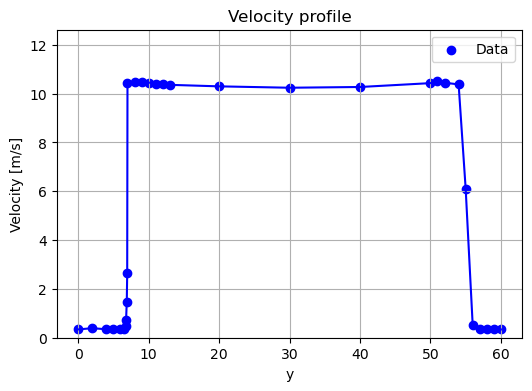

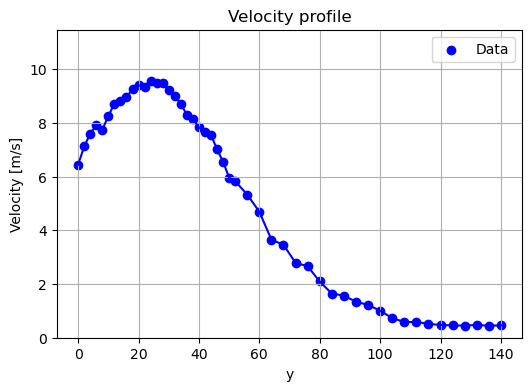

In [5]:
plot_profile( "Measurement\Data\Profile1")
plot_profile( "Measurement\Data\Profile2")